<a href="https://colab.research.google.com/github/laxmi-priya/Natural_language_processing/blob/main/ngram_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n-gram language model is explored for simple sentences and for news article classification(Kaggle dataset).

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range=(2, 2))#bi-gram lang model
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [4]:
v = CountVectorizer(ngram_range=(1,3))#uni-gram to tri-gram lang models
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

# bi-gram model for a corpus

In [5]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [6]:
import spacy
nlp = spacy.load("en_core_web_sm") 
def preprocess(text):#preprocess removes the stop word and punct and apply lemmatization
  doc = nlp(text)
  filtered_text = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_text.append(token.lemma_)
  return" ".join(filtered_text)



In [7]:
preprocess("Thor ate pizza")

'thor eat pizza'

In [8]:
processed_corpus = [preprocess(text) for text in corpus ]
processed_corpus

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [9]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(processed_corpus)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [10]:
v.transform(["Thor ate pizza"]).toarray()

array([[0, 0, 0, 0, 0, 1, 0, 1, 0]])

In [11]:
v.transform(["Loki is eating pizza"]).toarray()

array([[0, 0, 1, 0, 0, 1, 0, 0, 0]])

# News category classification

In [13]:
import pandas as pd

df = pd.read_json("/content/drive/MyDrive/nlp/News_Category_Dataset.json", lines=True)
df.head()


,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT


In [14]:
df_1= df[df.category=='SCIENCE']
df_2=df[df.category=='BUSINESS']
df_3=df[df.category=='SPORTS']
df_4=df[df.category=='CRIME']
df_4.shape

(2893, 6)

In [15]:
min_samples = min(len(df_1),len(df_2),len(df_3),len(df_4))

df_science = df_1.sample(min_samples, random_state=2022)
df_business = df_2.sample(min_samples, random_state=2022)
df_sports = df_3.sample(min_samples, random_state=2022)
df_crime = df_4.sample(min_samples, random_state=2022)

df_balanced = pd.concat([df_science, df_business, df_sports,df_crime],axis=0)
df_balanced.category.value_counts()

SCIENCE     1381
BUSINESS    1381
SPORTS      1381
CRIME       1381
Name: category, dtype: int64

In [16]:
df_balanced = df_balanced[["headline","category"]]
df_balanced.head()

,headline,category
85080,This Wine Chemistry Video Explains What Connoi...,SCIENCE
122455,SOLVED? Massive Magnetic Star Mystery,SCIENCE
79720,Invisibility Cloak May Be Moving Closer To Rea...,SCIENCE
9859,Oxford Researchers Make Startling Discovery Ab...,SCIENCE
123989,WATCH: Here's A Cool Trick To Help You See Wit...,SCIENCE


In [17]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    df_balanced.headline,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

Create a model using BOW

In [20]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),        #using default BOW
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       276
           1       0.90      0.84      0.87       277
           2       0.86      0.89      0.88       276
           3       0.86      0.82      0.84       276

    accuracy                           0.85      1105
   macro avg       0.85      0.85      0.85      1105
weighted avg       0.85      0.85      0.85      1105



Creating a model using bi-gram model

In [21]:
clf2 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),        #using uni-gram and bi-gram model
    ('Multi NB', MultinomialNB())
])
clf2.fit(X_train,Y_train)
Y_pred = clf2.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       276
           1       0.88      0.87      0.87       277
           2       0.88      0.89      0.89       276
           3       0.85      0.81      0.83       276

    accuracy                           0.85      1105
   macro avg       0.85      0.85      0.85      1105
weighted avg       0.85      0.85      0.85      1105



Using Preprocessing model

In [23]:
df_balanced['preprocessed_txt'] = df_balanced['headline'].apply(preprocess) #Adding the pre-processed data to the dataframe

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num)

In [25]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),        #using default BOW
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       276
           1       0.88      0.83      0.86       277
           2       0.83      0.91      0.87       276
           3       0.82      0.77      0.79       276

    accuracy                           0.84      1105
   macro avg       0.84      0.84      0.84      1105
weighted avg       0.84      0.84      0.84      1105



In [26]:
clf2 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),        #using uni-gram and bi-gram model
    ('Multi NB', MultinomialNB())
])
clf2.fit(X_train,Y_train)
Y_pred = clf2.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       276
           1       0.86      0.85      0.86       277
           2       0.83      0.91      0.87       276
           3       0.83      0.77      0.80       276

    accuracy                           0.84      1105
   macro avg       0.84      0.84      0.84      1105
weighted avg       0.84      0.84      0.84      1105



# Plotting confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[229,  11,  13,  23],
       [ 10, 236,  17,  14],
       [  8,  11, 250,   7],
       [ 28,  16,  20, 212]])

Text(95.72222222222221, 0.5, 'Truth')

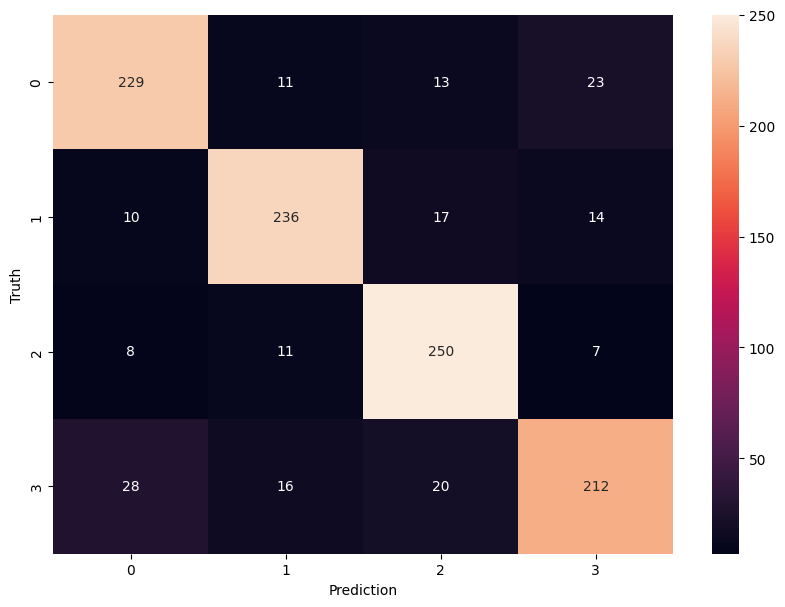

In [28]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')